In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Load the dataset
df = pd.read_csv('Startups.csv')

# Delete all row of data contains of '0' value
df = df[(df != 0).all(axis=1)]

# Split dataset features into 4 independent variables and 1 dependent variable
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

# Show data
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [3]:
# Encode categorical data
X = pd.get_dummies(X, columns=['State'])

# Show Data
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,False,True
1,162597.70,151377.59,443898.53,True,False,False
2,153441.51,101145.55,407934.54,False,True,False
3,144372.41,118671.85,383199.62,False,False,True
4,142107.34,91391.77,366168.42,False,True,False


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using sklearn library, train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Show coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Make predictions on the test set
y_pred = model.predict(X_test)

Coefficients: [ 7.78185559e-01 -6.68184214e-02  2.55194758e-02  2.45752950e+03
 -1.24815783e+03 -1.20937167e+03]
Intercept: 57612.18693326566


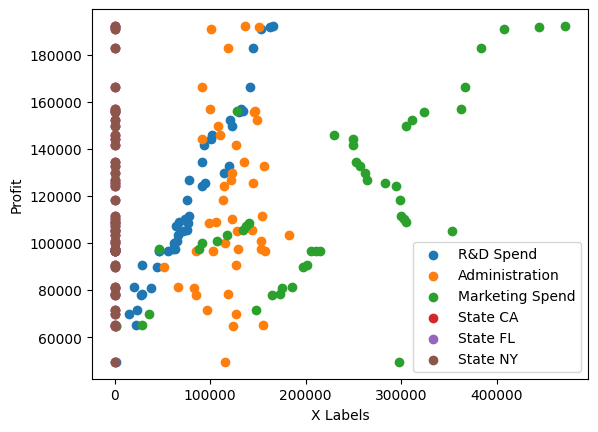

In [5]:
#scatter plot 
plt.scatter(X['R&D Spend'], y, label='R&D Spend')
plt.scatter(X['Administration'], y, label='Administration')
plt.scatter(X['Marketing Spend'], y, label='Marketing Spend')
plt.scatter(X['State_California'], y, label = 'State CA')
plt.scatter(X['State_Florida'], y, label='State FL')
plt.scatter(X['State_New York'], y, label='State NY')

#Adding labels and legends
plt.xlabel('X Labels')
plt.ylabel('Profit')
plt.legend()

#Display the plot
plt.show()

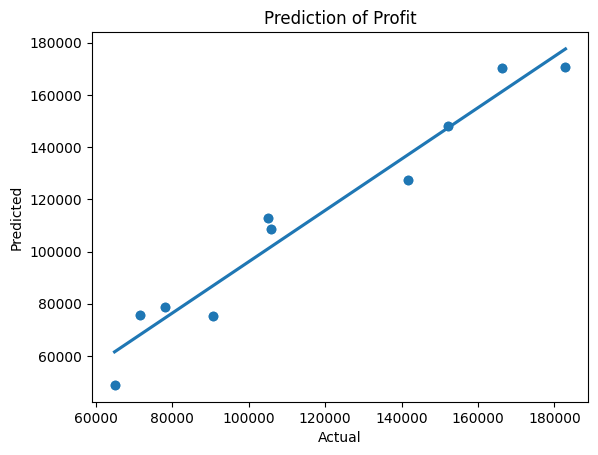

In [6]:
#plot of dataset
plt.scatter(y_test, y_pred)
sns.regplot(x=y_test,y=y_pred,ci=None);
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction of Profit')
plt.show()

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 97276375.31296173
R-squared: 0.9385926603829023
